In [14]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.options.display.max_columns= None

In [2]:
df=pd.read_csv('datos/coches_EDA.csv', index_col=0)
df.head(0)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price


## COLUMNAS INFO

- make: Marca del coche
  
- fuel-type: Tipo de combustible
  
- aspiration: Si el motor es turbo o de aspiración natural(motor convencional). Hacr referencia al funcionamiento del motor con el combustible.
  
- num-of-doors: Número de puertas
  
- body-style: Forma del coche
  
- drive-wheels: Qué ruedas transmiten la fuerza al vehículo (delanteras, traseras o 4x4)

- engine-location: Localización del motor
  
- wheel-base: Distancia entre las ruedas delanteras y traseras.
  
- lenght: Longitud del coche
  
- width: Ancho del coche 
  
- height: Altura del coche
  
- curb-weight: Peso del coche contando con el depósito lleno y el equipamiento de base del coche. 

- num-of-cylinders: Número de cilindros (cilindrada). No nos interesa castearlo porque son valores de los que no vamos a sacar la media, sino la frecuencia si lo encontramos interesante. 

- horsepower: Caballos

- peak-rpm: Revoluciones por minuto

- city-mpg: Kilómetros por minuto en ciudad.

- highway-mpg: Kilómetros por minuto en otras carreteras. 

- price: Precio del coche

>En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

>¿Qué diferencia existe el error de tipo I y el error de tipo II?


  - El error de tipo I tiene lugar cuando rechazamos la hipótesis nula pero en realidad es verdadera. En nuestro caso sería:
  
    - Rechazar que el precio NO depende de las diferentes características de un coche, es decir, aceptar que las características de un coche influyen en el precio, cuando en realidad la H0 es verdadera. Las distintas características NO influyen en el precio.  

  - El error de tipo II tiene lugar cuando aceptamos la hipótesis nula pero en realidad es falsa. En nuestro caso sería:
  
    - Aceptar que el precio NO depende de las diferentes características de un coche, es decir, rechazar que las características de un coche influyen en el precio, cuando en realidad la H0 es falsa. Las distintas características influyen en el precio.  

- ¿Qué es la asimetría?


La asimetría en un conjunto de datos tiene lugar cuando la distribución de un conjunto de datos está sesgado hacia la izquierda o hacia la derecha.

In [3]:
from scipy.stats import skew

In [6]:
numericas=df.select_dtypes(include='number')

In [7]:
skew(numericas)

array([1.00332039, 0.14272413, 0.85075219, 0.02014045, 0.68737853,
       1.14239074, 0.09452897, 0.68225659, 0.55345267, 1.77254584])

Todas nuestras variables numéricas tienen una asimetría positiva, es decir, están sesgadas a la derecha.

- ¿Es vuestra variable respuesta asimétrica?


In [8]:
skew(df['price'])

1.7725458426172567

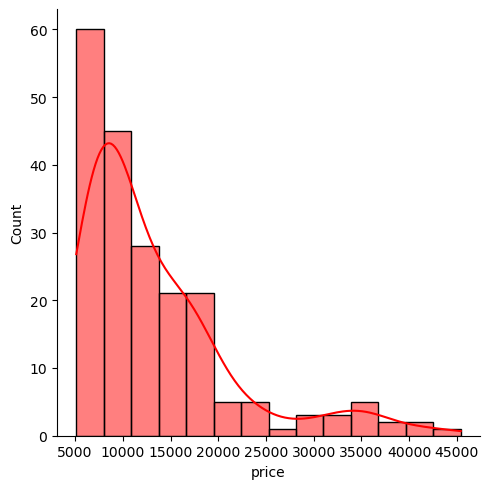

In [16]:
sns.displot(df['price'], kde=True, color='red')
plt.show();

Nuestra variable respuesta es asimétrica positiva, sesgada hacia la derecha. 

- ¿Qué tipo de curtosis presenta vuestra variable respuesta?


In [17]:
from scipy.stats import kurtosistest

In [18]:
kurtosistest(df['price'])

KurtosistestResult(statistic=4.423522230698567, pvalue=9.71046347927324e-06)

Nuestra variable respuesta tiene una curtosis leptocúrtica. Su valor es mayor que 0, es decir, positivo y distinto que 0.

- ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [29]:
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest

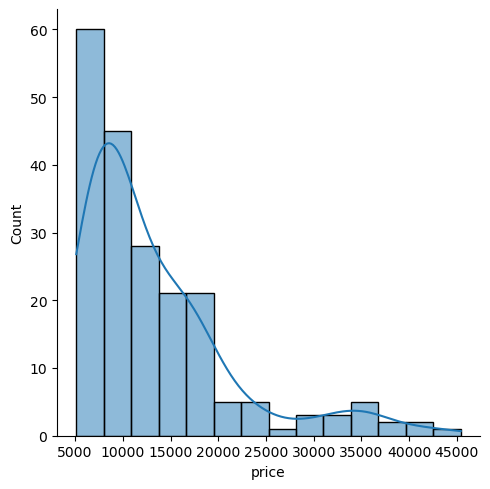

In [28]:
sns.displot(df['price'], kde=True)
plt.show();

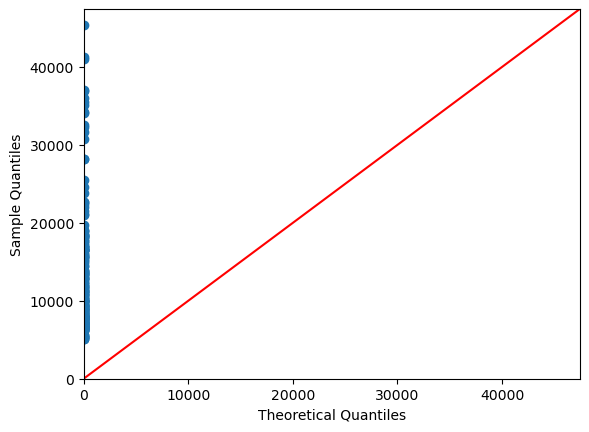

In [26]:
sm.qqplot(df['price'], line='45')
plt.show();

In [27]:
stats.shapiro(df['price'])

ShapiroResult(statistic=0.8023843765258789, pvalue=2.8731937788434737e-15)

In [30]:
kstest(df['price'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Nuestra variable respuesta NO es normal, ya que el p-valor es < que 0,05. Rechazamos la H0,  visualmente también se refleja la  no normalidad de los datos